In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [307]:
train = pd.read_csv('../datasets/titanic_train.csv')
test = pd.read_csv('../datasets/titanic_test.csv')

In [308]:
# Transform PassengerId to index
train.set_index("PassengerId", inplace=True)
test.set_index("PassengerId", inplace=True)

In [309]:
# Chekc dimensions
train.shape, test.shape
# Note that test has one column less (Survived) - this is the target

((891, 11), (418, 10))

In [310]:
# Create de col 'Survived' in test
test['Survived'] = np.nan
# Chekc dimensions
train.shape, test.shape

((891, 11), (418, 11))

In [311]:
# Concatenate train and test
data = pd.concat([train, test], sort=False)
# Chekc dimensions
data.shape

(1309, 11)

In [312]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [313]:
# Check the data nulls
data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [314]:
# Remove Cabin column
data.drop('Cabin', axis=1, inplace=True)
# Fill Embarked nulls with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# Fill Fare nulls with the mean
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

<Axes: >

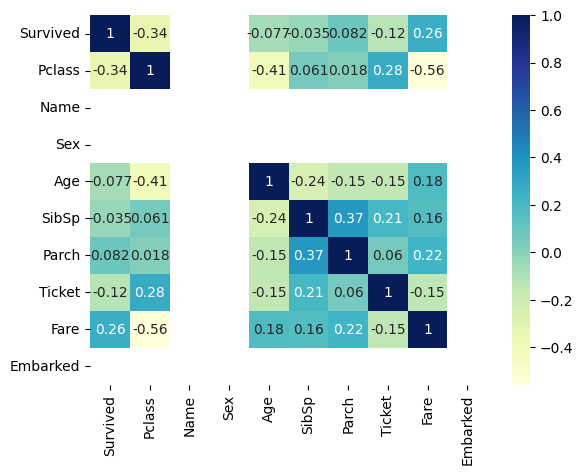

In [315]:
# Correlation - only numeric columns
data_numeric = data.apply(pd.to_numeric, errors='coerce')
corr = data_numeric.corr()
sns.heatmap(corr,annot=True, cmap='YlGnBu')

In [316]:
# Remove Survived from data
data.drop('Survived', axis=1, inplace=True)
# Check the data nulls
data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [317]:
# Create a Title column( extract title from name and create a new column with this titles)
data['Titles'] = data['Name'].str.extract('([a-zA-Z]+)\.')


In [318]:
pd.crosstab(data['Titles'], data['Sex'])

Sex,female,male
Titles,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [319]:
data['Titles'].apply(lambda x: 'Other'if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306     Other
1307        Mr
1308        Mr
1309    Master
Name: Titles, Length: 1309, dtype: object

In [320]:
# Check datafram
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   Titles    1309 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [321]:
# Remove Ticket and Name
data.drop(['Ticket', 'Name'], axis=1, inplace=True)
# check dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Titles    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB
